A intenção deste código é simular a probabilidade do Botafogo de Futebol e Regatas sair classificado pelo Grupo B na Copa do Mundo de Clubes da FIFA.

Vou utilizar o método de monte carlo para estudar diferentes cenários e a partir deles gerar uma porcentagem probabilistica de o Botafogo sair classificado.

In [14]:
import random
from collections import defaultdict
from IPython import get_ipython
from IPython.display import display

O metodo monte carlo executa um grande numero de possibilidades aleatórias, ou seja, ele calcula (com alguns parametros) as chances a partir do ponto X até o Y levando em consideração outras probabilidades intrícecas.

Portanto, será utilizado em primeiro momento o calculo somatório das possibilidades de 4 times enfretarem 3 situações possiveis (vitória, empate e derrota) em 3 etapas (1ª,2ª e 3ª rodada).
A partir disso, será feita um parametro simulando as regras da Copa do Mundo de Clubes (como pontuação, saldo de gols e número de faltas cometidas), e como não se tem as informações dos jogos futuros, pois na data de elaboração deste projeto o campeonato ainda se encontra na 1ª rodada, tentaremos a seguinte abordagem:
Será utilizado as ODDs de casas de aposta para porcentar as 3 situações possiveis e o histórico de gols do Botafogo e do PSG em jogos intercontinentais  (Libertadores da América e Champions League), com o objetivo de extrair uma noção mais proxima da média de gols por partida que estes clubes fazem.

In [15]:
# Criando DF
grupo_b = {
    "Paris Saint-Germain": {"pontos": 3, "vitorias": 1, "empates": 0, "derrotas": 0, "gols_pro": 4, "gols_contra": 0, "saldo_gols": 4},
    "Botafogo": {"pontos": 3, "vitorias": 1, "empates": 0, "derrotas": 0, "gols_pro": 2, "gols_contra": 1, "saldo_gols": 1},
    "Seattle Sounders": {"pontos": 0, "vitorias": 0, "empates": 0, "derrotas": 1, "gols_pro": 1, "gols_contra": 2, "saldo_gols": -1},
    "Atlético de Madrid": {"pontos": 0, "vitorias": 0, "empates": 0, "derrotas": 1, "gols_pro": 0, "gols_contra": 4, "saldo_gols": -4},
}

jogos_restantes = [
    ("Seattle Sounders", "Atlético de Madrid"),
    ("Paris Saint-Germain", "Botafogo"),
    ("Seattle Sounders", "Paris Saint-Germain"),
    ("Atlético de Madrid", "Botafogo"),
]

In [16]:
# No prob_resultados serão aplicadas as ODDs, elas precisam ser colocadas como porcentagem (até 1.0) e normalizadas
# (é possivel que o lucro da aposta esteja embutido), foi feito o seguinte calculo:
# formato (Time1=P1, Empate=PE, Time2=P2)
# S = P1+PE+P2
# P1/S = X (X= é o resultado que queremos, a ODD já normalizada e em porcentagem)

prob_resultados = {
    ("Seattle Sounders", "Atlético de Madrid"): (0.089, 0.325, 0.585), # ODDs time1(P1)= 9.00 Empate(PE)= 5.00 time(P2)= 1.38
    ("Paris Saint-Germain", "Botafogo"): (0.618, 0.323, 0.058), # ODDs time1(P1)= 1.23 Empate(PE)= 6.80 time2(P2)= 13.0
    ("Seattle Sounders", "Paris Saint-Germain"): (0.036, 0.265, 0.697), # ODDs time1(P1)= 1.11 Empate=(PE) 8.0 time2(P2)= 21.0
    ("Atlético de Madrid", "Botafogo"): (0.118, 0.352, 0.529), # ODDs time1(P1)= 1.45 Empate=(PE) 4.33 time2(P2)= 6.50
}

In [17]:
# Aqui vou optar por um caminho mais simples, poderia utlizar o mesmo método mais granular como o de cima para obter "chutes"
# com base na média de gols marcados em jogos importantes anteriores (como campeonatos na Libertadores e na Champions League),
# porém, pára simplificar, vou replicar uma média de gols com base nas proprias ODDs

# Aplicando uma média ponderada com fatores que vitória, empate e derrota

fator_vitoria = 1.5
fator_empate = 1.0
fator_derrota = 0.5

media_base_gols = 1.0

# Criando dicionário para incluir variaveis
expectativa_gols_por_time = {}

# Calculando a expectativa de gols para cada time
for time in ["Paris Saint-Germain", "Botafogo", "Seattle Sounders", "Atlético de Madrid"]:
    total_expectativa_pro = 0
    total_expectativa_contra = 0
    num_jogos = 0

    for jogo, probabilidades in prob_resultados.items():
        time1, time2 = jogo
        prob_v1, prob_e, prob_v2 = probabilidades

        if time == time1:

            expectativa_pro_jogo = (prob_v1 * fator_vitoria + prob_e * fator_empate + prob_v2 * fator_derrota) * media_base_gols
            expectativa_contra_jogo = (prob_v1 * fator_derrota + prob_e * fator_empate + prob_v2 * fator_vitoria) * media_base_gols
            total_expectativa_pro += expectativa_pro_jogo
            total_expectativa_contra += expectativa_contra_jogo
            num_jogos += 1

        elif time == time2:

            expectativa_pro_jogo = (prob_v2 * fator_vitoria + prob_e * fator_empate + prob_v1 * fator_derrota) * media_base_gols
            expectativa_contra_jogo = (prob_v2 * fator_derrota + prob_e * fator_empate + prob_v1 * fator_vitoria) * media_base_gols
            total_expectativa_pro += expectativa_pro_jogo
            total_expectativa_contra += expectativa_contra_jogo
            num_jogos += 1

    if num_jogos > 0:
        expectativa_gols_por_time[time] = {
            "pro_medio": total_expectativa_pro / num_jogos,
            "contra_medio": total_expectativa_contra / num_jogos
        }
    else:
         expectativa_gols_por_time[time] = {
            "pro_medio": media_base_gols,
            "contra_medio": media_base_gols
        }

print("Expectativa de Gols por Time (baseada nas ODDs e fatores):")
for time, gols in expectativa_gols_por_time.items():
    print(f"- {time}: Gols Pró Esperados: {gols['pro_medio']:.2f}, Gols Contra Esperados: {gols['contra_medio']:.2f}")


Expectativa de Gols por Time (baseada nas ODDs e fatores):
- Paris Saint-Germain: Gols Pró Esperados: 1.30, Gols Contra Esperados: 0.69
- Botafogo: Gols Pró Esperados: 0.96, Gols Contra Esperados: 1.04
- Seattle Sounders: Gols Pró Esperados: 0.71, Gols Contra Esperados: 1.29
- Atlético de Madrid: Gols Pró Esperados: 1.02, Gols Contra Esperados: 0.98


In [18]:
# Agora será aplicado este resultado de média na simulação

def simular_jogo_com_gols(time1, time2, probabilidades, expectativas_gols):
    resultado = random.choices(["vitoria_time1", "empate", "vitoria_time2"], weights=probabilidades, k=1)[0]

    gols_time1 = 0
    gols_time2 = 0


    exp_pro_t1 = expectativas_gols.get(time1, {}).get("pro_medio", 1.0)
    exp_contra_t1 = expectativas_gols.get(time1, {}).get("contra_medio", 1.0)
    exp_pro_t2 = expectativas_gols.get(time2, {}).get("pro_medio", 1.0)
    exp_contra_t2 = expectativas_gols.get(time2, {}).get("contra_medio", 1.0)


    if resultado == "vitoria_time1":

        min_gols_t1 = max(1, int(exp_pro_t1 - 0.5))
        max_gols_t1 = max(min_gols_t1 + 1, int(exp_pro_t1 + 1.0))
        gols_time1 = random.randint(min_gols_t1, max_gols_t1)

        min_gols_t2 = max(0, int(exp_pro_t2 - 1.0))
        max_gols_t2 = int(exp_pro_t2 + 0.5)
        gols_time2 = random.randint(min_gols_t2, max_gols_t2)


        if gols_time1 <= gols_time2:
            gols_time1 = gols_time2 + 1

        # Ajeitando parametro de placar para não sair muito de possibilidades reais
        gols_time1 = max(gols_time1, 0)
        gols_time2 = max(gols_time2, 0)


        return time1, 3, gols_time1, gols_time2, time2, 0, gols_time2, gols_time1

    elif resultado == "vitoria_time2":
        # Aplicando lógica inversa do que foi posto anteriormente
        min_gols_t2 = max(1, int(exp_pro_t2 - 0.5))
        max_gols_t2 = max(min_gols_t2 + 1, int(exp_pro_t2 + 1.0))
        gols_time2 = random.randint(min_gols_t2, max_gols_t2)

        min_gols_t1 = max(0, int(exp_pro_t1 - 1.0))
        max_gols_t1 = int(exp_pro_t1 + 0.5)
        gols_time1 = random.randint(min_gols_t1, max_gols_t1)

        if gols_time2 <= gols_time1:
            gols_time2 = gols_time1 + 1

        gols_time1 = max(gols_time1, 0)
        gols_time2 = max(gols_time2, 0)

        return time2, 3, gols_time2, gols_time1, time1, 0, gols_time1, gols_time2

    else:
      # Será definido o range com base na possibilidade de vitoria dos dois times (e com isso, marcação de gols)
        exp_media_jogo = (exp_pro_t1 + exp_pro_t2) / 2.0
        min_gols_empate = max(0, int(exp_media_jogo - 0.5))
        max_gols_empate = max(min_gols_empate, int(exp_media_jogo + 0.5))

        gols_comuns = random.randint(min_gols_empate, max_gols_empate)

        gols_time1 = max(gols_comuns, 0)
        gols_time2 = gols_time1

        return time1, 1, gols_time1, gols_time2, time2, 1, gols_time2, gols_time1


In [19]:
# Aplicando função para atualizar a tabela
def atualizar_tabela(tabela_grupo, time_vencedor, pontos_vencedor, gols_pro_v, gols_contra_v, time_perdedor, pontos_perdedor, gols_pro_p, gols_contra_p):
    tabela_grupo[time_vencedor]["pontos"] += pontos_vencedor
    tabela_grupo[time_vencedor]["gols_pro"] += gols_pro_v
    tabela_grupo[time_vencedor]["gols_contra"] += gols_contra_v
    tabela_grupo[time_vencedor]["saldo_gols"] += (gols_pro_v - gols_contra_v)
    if pontos_vencedor == 3:
        tabela_grupo[time_vencedor]["vitorias"] += 1
    elif pontos_vencedor == 1:
        tabela_grupo[time_vencedor]["empates"] += 1
    else:
        tabela_grupo[time_vencedor]["derrotas"] += 1

    tabela_grupo[time_perdedor]["pontos"] += pontos_perdedor
    tabela_grupo[time_perdedor]["gols_pro"] += gols_pro_p
    tabela_grupo[time_perdedor]["gols_contra"] += gols_contra_p
    tabela_grupo[time_perdedor]["saldo_gols"] += (gols_pro_p - gols_contra_p)
    if pontos_perdedor == 3:
        tabela_grupo[time_perdedor]["vitorias"] += 1
    elif pontos_perdedor == 1:
        tabela_grupo[time_perdedor]["empates"] += 1
    else:
        tabela_grupo[time_perdedor]["derrotas"] += 1

In [20]:
# Função para determinar a classificação final levando em consideração os critérios de desempate
def classificar_grupo(tabela_grupo):

    times_ordenados = list(tabela_grupo.items())

    # Ordem dos critérios: Pontos > Saldo de Gols > Gols Marcados

    def criterio_desempate(item):
        return (item[1]["pontos"], item[1]["saldo_gols"], item[1]["gols_pro"])

    times_ordenados.sort(key=criterio_desempate, reverse=True)

    return [time[0] for time in times_ordenados]

In [21]:
# Aplicando a simulação de monte carlo
num_simulacoes = 50000 # já que são poucos dados, será utilizado muitas simulações
classificacoes_botafogo_primeiro = 0
classificacoes_botafogo_segundo = 0
classificacoes_outros = defaultdict(lambda: {"1st": 0, "2nd": 0})

for _ in range(num_simulacoes):
    # Criando cópia da tabela para aplicar simulação
    tabela_temp = {time: dados.copy() for time, dados in grupo_b.items()}

    for jogo in jogos_restantes:
        time1, time2 = jogo
        prob = prob_resultados.get(jogo)
        if prob is None:
            # Será preciso aplicar uma probabilidade genérica para a simulação
            prob = prob_resultados.get((time2, time1))
            if prob:
                prob = (prob[2], prob[1], prob[0])
            else:

                prob = (1/3, 1/3, 1/3)


        vencedor, pts_v, gp_v, gc_v, perdedor, pts_p, gp_p, gc_p = simular_jogo_com_gols(time1, time2, prob, expectativa_gols_por_time)
        atualizar_tabela(tabela_temp, vencedor, pts_v, gp_v, gc_v, perdedor, pts_p, gp_p, gc_p)

    classificacao_final = classificar_grupo(tabela_temp)

    # Partindo da contabilização do botafogo
    if classificacao_final[0] == "Botafogo":
        classificacoes_botafogo_primeiro += 1
    elif classificacao_final[1] == "Botafogo":
        classificacoes_botafogo_segundo += 1

    # Contabilizando as posições dos outros times
    for i, time in enumerate(classificacao_final):
        if i == 0:
            classificacoes_outros[time]["1st"] += 1
        elif i == 1:
            classificacoes_outros[time]["2nd"] += 1

In [22]:
# Printando resultados
prob_primeiro = (classificacoes_botafogo_primeiro / num_simulacoes) * 100
prob_segundo = (classificacoes_botafogo_segundo / num_simulacoes) * 100
prob_classificacao = prob_primeiro + prob_segundo

print(f"--- Análise de Probabilidade do Grupo B ({num_simulacoes} simulações) ---")
print(f"**Situação Atual do Grupo B:**")
for time, dados in grupo_b.items():
    print(f"- {time}: {dados['pontos']} pts, SG: {dados['saldo_gols']}, GP: {dados['gols_pro']}")
print("\n**Probabilidades de Classificação do Botafogo:**")
print(f"Probabilidade do Botafogo terminar em 1º lugar: {prob_primeiro:.2f}%")
print(f"Probabilidade do Botafogo terminar em 2º lugar: {prob_segundo:.2f}%")
print(f"Probabilidade total do Botafogo se classificar (1º ou 2º): {prob_classificacao:.2f}%")
print("\n**Probabilidades dos Outros Times (Apenas para referência):**")
for time in sorted(classificacoes_outros.keys()):
    if time != "Botafogo":
        prob_time_1st = (classificacoes_outros[time]["1st"] / num_simulacoes) * 100
        prob_time_2nd = (classificacoes_outros[time]["2nd"] / num_simulacoes) * 100
        print(f"- {time}: 1º Lugar: {prob_time_1st:.2f}%, 2º Lugar: {prob_time_2nd:.2f}%")

--- Análise de Probabilidade do Grupo B (50000 simulações) ---
**Situação Atual do Grupo B:**
- Paris Saint-Germain: 3 pts, SG: 4, GP: 4
- Botafogo: 3 pts, SG: 1, GP: 2
- Seattle Sounders: 0 pts, SG: -1, GP: 1
- Atlético de Madrid: 0 pts, SG: -4, GP: 0

**Probabilidades de Classificação do Botafogo:**
Probabilidade do Botafogo terminar em 1º lugar: 10.55%
Probabilidade do Botafogo terminar em 2º lugar: 79.35%
Probabilidade total do Botafogo se classificar (1º ou 2º): 89.90%

**Probabilidades dos Outros Times (Apenas para referência):**
- Atlético de Madrid: 1º Lugar: 0.67%, 2º Lugar: 8.33%
- Paris Saint-Germain: 1º Lugar: 88.72%, 2º Lugar: 10.91%
- Seattle Sounders: 1º Lugar: 0.06%, 2º Lugar: 1.41%


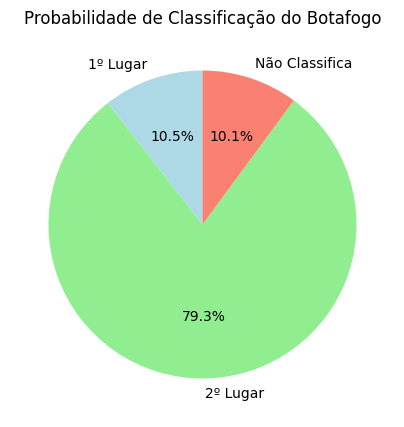

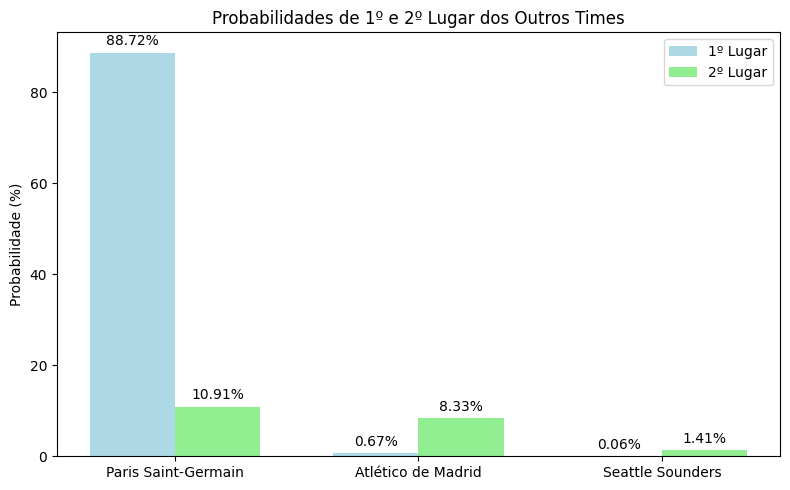

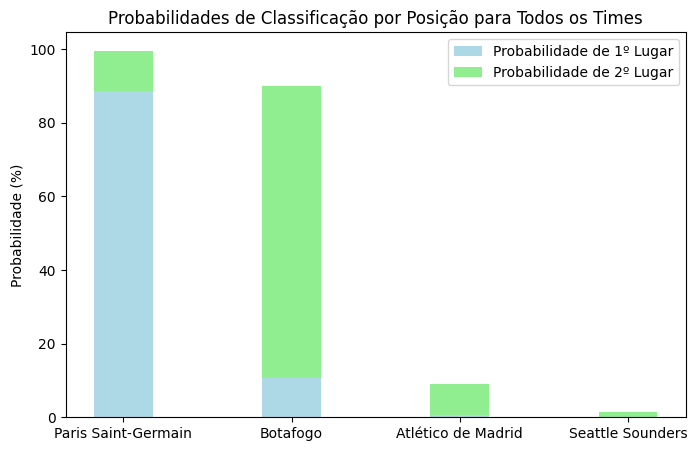

In [26]:
# prompt: Plote 3 graficos com base nas informações geradas pela celula anterior:
# --- Análise de Probabilidade do Grupo B (50000 simulações) ---
# **Situação Atual do Grupo B:**
# - Paris Saint-Germain: 3 pts, SG: 4, GP: 4
# - Botafogo: 3 pts, SG: 1, GP: 2
# - Seattle Sounders: 0 pts, SG: -1, GP: 1
# - Atlético de Madrid: 0 pts, SG: -4, GP: 0
# **Probabilidades de Classificação do Botafogo:**
# Probabilidade do Botafogo terminar em 1º lugar: 10.55%
# Probabilidade do Botafogo terminar em 2º lugar: 79.35%
# Probabilidade total do Botafogo se classificar (1º ou 2º): 89.90%
# **Probabilidades dos Outros Times (Apenas para referência):**
# - Atlético de Madrid: 1º Lugar: 0.67%, 2º Lugar: 8.33%
# - Paris Saint-Germain: 1º Lugar: 88.72%, 2º Lugar: 10.91%
# - Seattle Sounders: 1º Lugar: 0.06%, 2º Lugar: 1.41%
# volte em como estava antes das alterações de cores

import matplotlib.pyplot as plt
import numpy as np

# Dados para o gráfico de Classificação do Botafogo
labels_botafogo = ['1º Lugar', '2º Lugar', 'Não Classifica']
sizes_botafogo = [prob_primeiro, prob_segundo, 100 - prob_classificacao]
colors_botafogo = ['lightblue', 'lightgreen', 'salmon']

# Gráfico 1: Probabilidade de Classificação do Botafogo (Pizza)
plt.figure(figsize=(5, 5))
plt.pie(sizes_botafogo, labels=labels_botafogo, autopct='%1.1f%%', colors=colors_botafogo, startangle=90)
plt.title('Probabilidade de Classificação do Botafogo')
plt.show()

# Dados para o gráfico de Probabilidades dos Outros Times
times = [time for time in classificacoes_outros.keys() if time != "Botafogo"]
prob_1st = [(classificacoes_outros[time]["1st"] / num_simulacoes) * 100 for time in times]
prob_2nd = [(classificacoes_outros[time]["2nd"] / num_simulacoes) * 100 for time in times]

x = np.arange(len(times))
width = 0.35

# Gráfico 2: Probabilidades dos Outros Times (Barras Agrupadas)
fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, prob_1st, width, label='1º Lugar', color='lightblue')
rects2 = ax.bar(x + width/2, prob_2nd, width, label='2º Lugar', color='lightgreen')

ax.set_ylabel('Probabilidade (%)')
ax.set_title('Probabilidades de 1º e 2º Lugar dos Outros Times')
ax.set_xticks(x)
ax.set_xticklabels(times)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.2f%%' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()


# Dados para o gráfico de Probabilidades de Todos os Times por Posição
times_all = list(classificacoes_outros.keys())
prob_1st_all = [(classificacoes_outros[time]["1st"] / num_simulacoes) * 100 for time in times_all]
prob_2nd_all = [(classificacoes_outros[time]["2nd"] / num_simulacoes) * 100 for time in times_all]

x_all = np.arange(len(times_all))

# Gráfico 3: Probabilidades de Todos os Times por Posição (Barras Empilhadas)
plt.figure(figsize=(8 , 5))
plt.bar(x_all, prob_1st_all, width, label='Probabilidade de 1º Lugar', color='lightblue')
plt.bar(x_all, prob_2nd_all, width, bottom=prob_1st_all, label='Probabilidade de 2º Lugar', color='lightgreen')

plt.ylabel('Probabilidade (%)')
plt.title('Probabilidades de Classificação por Posição para Todos os Times')
plt.xticks(x_all, times_all)
plt.legend()

plt.show()
